In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data is tab seperated using 'comma' and naming columns manually as the data doesn't have headers
data_df = pd.read_csv("dating_cleaned_data.csv")

In [5]:
data_df = data_df.dropna()

# create another gender column
data_df['Gender_P2'] = data_df['Gender_P1'].apply(lambda x: "female" if x == "male" else "male")

In [ ]:
data_df['Age_M'] = data_df.apply(lambda row : row['Age_P1'] if row['Gender_P1'] == "male" else row["Age_P2"] ,axis = 1)
data_df['Age_F'] = data_df.apply(lambda row : row['Age_P1'] if row['Gender_P1'] == "female" else row["Age_P2"] ,axis = 1)

data_df['Race_M'] = data_df.apply(lambda row : row['Race_P1'] if row['Gender_P1'] == "male" else row["Race_P2"] ,axis = 1)
data_df['Race_F'] = data_df.apply(lambda row : row['Race_P1'] if row['Gender_P1'] == "female" else row["Race_P2"] ,axis = 1)


# Self rating of attractiveness
data_df['Attractive_M_M'] = data_df.apply(lambda row : row['Attractive_P1_P1'] if row['Gender_P1'] == "male" else row["Attractive_P2_P2"] ,axis = 1)
data_df['Attractive_F_F'] = data_df.apply(lambda row : row['Attractive_P1_P1'] if row['Gender_P1'] == "female" else row["Attractive_P2_P2"] ,axis = 1)

# Self Sincerity Rating
data_df['Sincere_M_M'] = data_df.apply(lambda row : row['Sincere_P1_P1'] if row['Gender_P1'] == "male" else row["Sincere_P2_P2"] ,axis = 1)
data_df['Sincere_F_F'] = data_df.apply(lambda row : row['Sincere_P1_P1'] if row['Gender_P1'] == "female" else row["Sincere_P2_P2"] ,axis = 1)


# Self Intelligence Rating
data_df['Intelligence_M_M'] = data_df.apply(lambda row : row['Intelligence_P1_P1'] if row['Gender_P1'] == "male" else row["Intelligence_P2_P2"] ,axis = 1)
data_df['Intelligence_F_F'] = data_df.apply(lambda row : row['Intelligence_P1_P1'] if row['Gender_P1'] == "female" else row["Intelligence_P2_P2"] ,axis = 1)

# Self Funny Rating
data_df['Funny_M_M'] = data_df.apply(lambda row : row['Funny_P1_P1'] if row['Gender_P1'] == "male" else row["Funny_P2_P2"] ,axis = 1)
data_df['Funny_F_F'] = data_df.apply(lambda row : row['Funny_P1_P1'] if row['Gender_P1'] == "female" else row["Funny_P2_P2"] ,axis = 1)

# Self Ambition Rating
data_df['Ambition_M_M'] = data_df.apply(lambda row : row['Ambition_P1_P1'] if row['Gender_P1'] == "male" else row["Ambition_P2_P2"] ,axis = 1)
data_df['Ambition_F_F'] = data_df.apply(lambda row : row['Ambition_P1_P1'] if row['Gender_P1'] == "female" else row["Ambition_P2_P2"] ,axis = 1)


# Attractive Importance in Partner
data_df['AttractiveImportance_M_M'] = data_df.apply(lambda row : row['AttractiveImportance_P1_P2'] if row['Gender_P1'] == "male" else row["AttractiveImportance_P2"] ,axis = 1)
data_df['AttractiveImportance_F_F'] = data_df.apply(lambda row : row['AttractiveImportance_P1_P2'] if row['Gender_P1'] == "female" else row["AttractiveImportance_P2"] ,axis = 1)

# Sincerity Importance in Partner
data_df['SincereImportance_M_M'] = data_df.apply(lambda row : row['SincereImportance_P1_P2'] if row['Gender_P1'] == "male" else row["SincereImportance_P2"] ,axis = 1)
data_df['SincereImportance_F_F'] = data_df.apply(lambda row : row['SincereImportance_P1_P2'] if row['Gender_P1'] == "female" else row["SincereImportance_P2"] ,axis = 1)

# Intelligence Importance in Partner
data_df['IntelligenceImportance_M_M'] = data_df.apply(lambda row : row['IntelligenceImportance_P1_P2'] if row['Gender_P1'] == "male" else row["IntelligenceImportance_P2"] ,axis = 1)
data_df['IntelligenceImportance_F_F'] = data_df.apply(lambda row : row['IntelligenceImportance_P1_P2'] if row['Gender_P1'] == "female" else row["IntelligenceImportance_P2"] ,axis = 1)


# Ambitious Importance in Partner
data_df['AmbitiousImportance_M_M'] = data_df.apply(lambda row : row['AmbitiousImportance_P1_P2'] if row['Gender_P1'] == "male" else row["AmbitiousImportance_P2"] ,axis = 1)
data_df['AmbitiousImportance_F_F'] = data_df.apply(lambda row : row['AmbitiousImportance_P1_P2'] if row['Gender_P1'] == "female" else row["AmbitiousImportance_P2"] ,axis = 1)

# Shared Importance in Partner
data_df['SharedInterestImportance_M_M'] = data_df.apply(lambda row : row['SharedInterestImportance_P1_P2'] if row['Gender_P1'] == "male" else row["SharedInterestImportance_P2"] ,axis = 1)
data_df['SharedInterestImportance_F_F'] = data_df.apply(lambda row : row['SharedInterestImportance_P1_P2'] if row['Gender_P1'] == "female" else row["SharedInterestImportance_P2"] ,axis = 1)


#data_df['ImportanceSameRace_M'] = data_df.apply(lambda row : row['ImportanceSameRace_P1'] if row['Gender_P1'] == "male" else row["ImportanceSameRace_P2"] ,axis = 1)
#data_df['ImportanceSameRace_F'] = data_df.apply(lambda row : row['ImportanceSameRace_P1'] if row['Gender_P1'] == "female" else row["ImportanceSameRace_P2"] ,axis = 1)

In [35]:
data_df['race_combination'] = data_df.apply(lambda row: frozenset([row['Race_P1'], row['Race_P2']]), axis=1)

In [37]:
display(data_df.groupby(['race_combination']).agg(
    num_samples = ('IsMatch','count'),
    match_perc = ('IsMatch','mean')
).reset_index().sort_values( by='match_perc', ascending = False ))

,race_combination,num_samples,match_perc
8,(Black/African American),16,0.562500
12,"(Other, Black/African American)",36,0.416667
7,"(Other, Latino/Hispanic American)",79,0.379747
13,(Latino/Hispanic American),46,0.217391
11,"(Black/African American, Latino/Hispanic Ameri...",57,0.210526
10,"(Black/African American, European/Caucasian-Am...",395,0.192405
9,"(Black/African American, Asian/Pacific Islande...",173,0.190751
5,"(Other, European/Caucasian-American)",473,0.188161
4,"(European/Caucasian-American, Latino/Hispanic ...",567,0.185185
3,(European/Caucasian-American),2182,0.181943


In [9]:
data_df.dtypes

Gender_P1                          object
Age_P1                            float64
Age_P2                            float64
Age Difference                      int64
Race_P1                            object
Race_P2                            object
SameRaceFlag                        int64
ImportanceSameRace_P1             float64
ImportanceSameReligion_P1         float64
FieldofStudy_P1                    object
AttractiveImportance_P2           float64
SincereImportance_P2              float64
IntelligenceImportance_P2         float64
FunnyImportance_P2                float64
AmbitiousImportance_P2            float64
SharedInterestImportance_P2       float64
AttractiveImportance_P1_P2        float64
SincereImportance_P1_P2           float64
IntelligenceImportance_P1_P2      float64
FunnyImportance_P1_P2             float64
AmbitiousImportance_P1_P2         float64
SharedInterestImportance_P1_P2    float64
Attractive_P1_P1                  float64
Sincere_P1_P1                     

In [23]:
x = data_df.groupby(['Age Difference','Race_P1']).agg(
    num_samples = ('IsMatch','count'),
    match_percentage = ('IsMatch','mean')
)

print(x.to_string())

                                                      num_samples  match_percentage
Age Difference Race_P1                                                             
0              Asian/Pacific Islander/Asian-American          153          0.163399
               Black/African American                          27          0.444444
               European/Caucasian-American                    310          0.196774
               Latino/Hispanic American                        46          0.195652
               Other                                           40          0.200000
1              Asian/Pacific Islander/Asian-American          342          0.140351
               Black/African American                          70          0.214286
               European/Caucasian-American                    687          0.202329
               Latino/Hispanic American                        81          0.246914
               Other                                           82          0

In [9]:
data_df

,Gender_P1,Age_P1,Age_P2,Age Difference,Race_P1,Race_P2,SameRaceFlag,ImportanceSameRace_P1,ImportanceSameReligion_P1,FieldofStudy_P1,...,AttractiveImportance_M_M,AttractiveImportance_F_F,SincereImportance_M_M,SincereImportance_F_F,IntelligenceImportance_M_M,IntelligenceImportance_F_F,AmbitiousImportance_M_M,AmbitiousImportance_F_F,SharedInterestImportance_M_M,SharedInterestImportance_F_F
0,female,21.0,27.0,6,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,35.0,15.0,20.0,20.0,20.0,20.0,0.0,15.0,5.0,15.0
1,female,21.0,22.0,1,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,60.0,15.0,0.0,20.0,0.0,20.0,0.0,15.0,0.0,15.0
2,female,21.0,22.0,1,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,Law,...,19.0,15.0,18.0,20.0,19.0,20.0,14.0,15.0,12.0,15.0
3,female,21.0,23.0,2,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,30.0,15.0,5.0,20.0,15.0,20.0,5.0,15.0,5.0,15.0
4,female,21.0,24.0,3,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,...,30.0,15.0,10.0,20.0,20.0,20.0,10.0,15.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,male,25.0,28.0,3,European/Caucasian-American,Other,0,1.0,1.0,Climate Dynamics,...,70.0,25.0,0.0,15.0,15.0,25.0,0.0,10.0,0.0,10.0
8368,male,25.0,26.0,1,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Climate Dynamics,...,70.0,10.0,0.0,30.0,15.0,20.0,0.0,15.0,0.0,10.0
8369,male,25.0,22.0,3,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Climate Dynamics,...,70.0,10.0,0.0,20.0,15.0,15.0,0.0,15.0,0.0,20.0
8370,male,25.0,27.0,2,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,1.0,1.0,Climate Dynamics,...,70.0,10.0,0.0,25.0,15.0,20.0,0.0,5.0,0.0,20.0


In [307]:
df_union = pd.concat([ data_df[['Race_P1','IsMatch']], data_df[['Race_P2','IsMatch']] ], ignore_index=True)
df_union['Race_Final'] = df_union.apply(lambda row : row['Race_P1'] if pd.isna(row['Race_P2']) else row['Race_P2'], axis = 1)


x = df_union.groupby(['Race_Final']).agg(
    Total_Samples = ('IsMatch','count'),
    Match_Percentage = ('IsMatch','mean')
).reset_index()

x['Match_Rate'] = x['Match_Percentage']*100
x.rename(columns={'Race_Final': 'Race'}, inplace=True)


x

,Race,Total_Samples,Match_Percentage,Match_Rate
0,Asian/Pacific Islander/Asian-American,3302,0.143549,14.354936
1,Black/African American,693,0.222222,22.222222
2,European/Caucasian-American,7604,0.172672,17.267228
3,Latino/Hispanic American,1040,0.191346,19.134615
4,Other,897,0.205128,20.512821


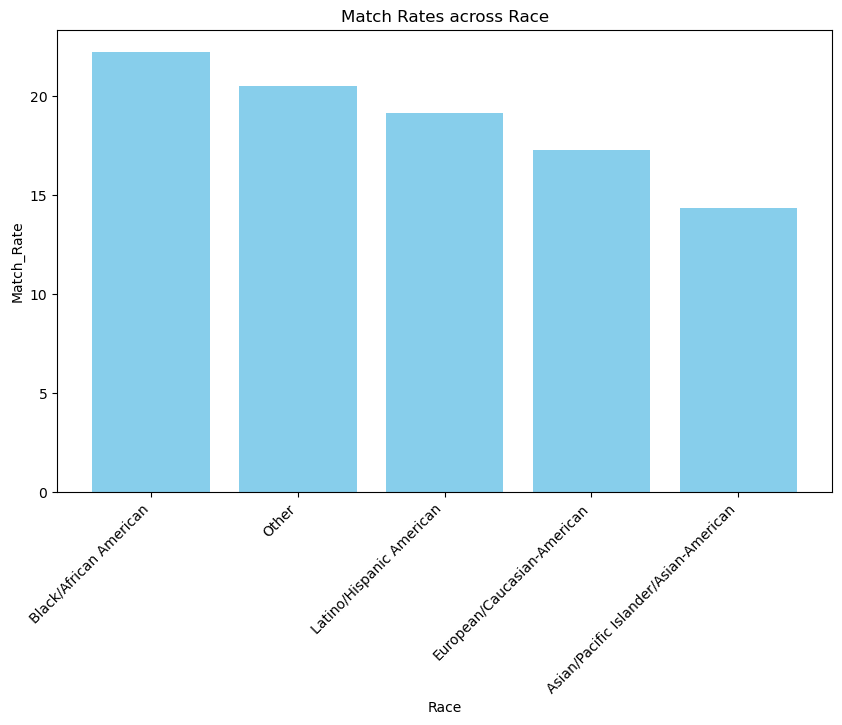

In [59]:
#df_union = data_df[['Race_P1','IsMatch']].append(data_df[['Race_P2','IsMatch']], ignore_index=True)

###

df_union = pd.concat([ data_df[['Race_P1','IsMatch']], data_df[['Race_P2','IsMatch']] ], ignore_index=True)
df_union['Race_Final'] = df_union.apply(lambda row : row['Race_P1'] if pd.isna(row['Race_P2']) else row['Race_P2'], axis = 1)


x = df_union.groupby(['Race_Final']).agg(
    Total_Samples = ('IsMatch','count'),
    Match_Percentage = ('IsMatch','mean')
).reset_index()

x['Match_Rate'] = x['Match_Percentage']*100
x.rename(columns={'Race_Final': 'Race'}, inplace=True)
# Sort the DataFrame by 'Value' in descending order

x_sorted = x.sort_values(by='Match_Rate', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x_sorted['Race'], x_sorted['Match_Rate'], color='skyblue')
plt.xlabel('Race')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Race')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()




In [41]:
data_df['IsMatch'].value_counts()

IsMatch
0    5606
1    1162
Name: count, dtype: int64

In [65]:
data_df.groupby(['Race_P1','Race_P2']).agg(
     num_samples = ('IsMatch', 'count'), 
    total_matches = ('IsMatch', 'sum'),
    match_perc = ('IsMatch', 'mean')
)

num_samples  \
Race_P1                               Race_P2                                              
Asian/Pacific Islander/Asian-American Asian/Pacific Islander/Asian-American          422   
                                      Black/African American                          87   
                                      European/Caucasian-American                    915   
                                      Latino/Hispanic American                       125   
                                      Other                                          120   
Black/African American                Asian/Pacific Islander/Asian-American           86   
                                      Black/African American                          16   
                                      European/Caucasian-American                    190   
                                      Latino/Hispanic American                        28   
                                      Other                                           18   
European/Caucasian-American           Asian/Pacific Islander/Asian-American          890   
                                      Black/African American                         205   
                                      European/Caucasian-American                   2182   
                                      Latino/Hispanic American                       296   
                                      Other                                          236   
Latino/Hispanic American              Asian/Pacific Islander/Asian-American          120   
                                      Black/African American                          29   
                                      European/Caucasian-American                    271   
                                      Latino/Hispanic American                        46   
                                      Other                                           36   
Other                                 Asian/Pacific Islander/Asian-American          115   
                                      Black/African American                          18   
                                      European/Caucasian-American                    237   
                                      Latino/Hispanic American                        43   
                                      Other                                           37   

                                                                             total_matches  \
Race_P1                               Race_P2                                                
Asian/Pacific Islander/Asian-American Asian/Pacific Islander/Asian-American             59   
                                      Black/African American                            15   
                                      European/Caucasian-American                      124   
                                      Latino/Hispanic American                          16   
                                      Other                                             21   
Black/African American                Asian/Pacific Islander/Asian-American             18   
                                      Black/African American                             9   
                                      European/Caucasian-American                       37   
                                      Latino/Hispanic American                           5   
                                      Other                                              8   
European/Caucasian-American           Asian/Pacific Islander/Asian-American            125   
                                      Black/African American                            39   
                                      European/Caucasian-American                      397   
                                      Latino/Hispanic American                          57   
                                      Other                                             

In [63]:
d = data_df.groupby(['Race_P1']).agg(
    total_samples = ('IsMatch', 'count'), 
    num_matches = ('IsMatch', 'sum'),
    ck = ('IsMatch', 'mean')
)
d['match_perc'] = d['num_matches']/d['total_samples']

d

,total_samples,num_matches,ck,match_perc
Race_P1,,,,
Asian/Pacific Islander/Asian-American,1669,235,0.140803,0.140803
Black/African American,338,77,0.227811,0.227811
European/Caucasian-American,3809,665,0.174587,0.174587
Latino/Hispanic American,502,97,0.193227,0.193227
Other,450,88,0.195556,0.195556


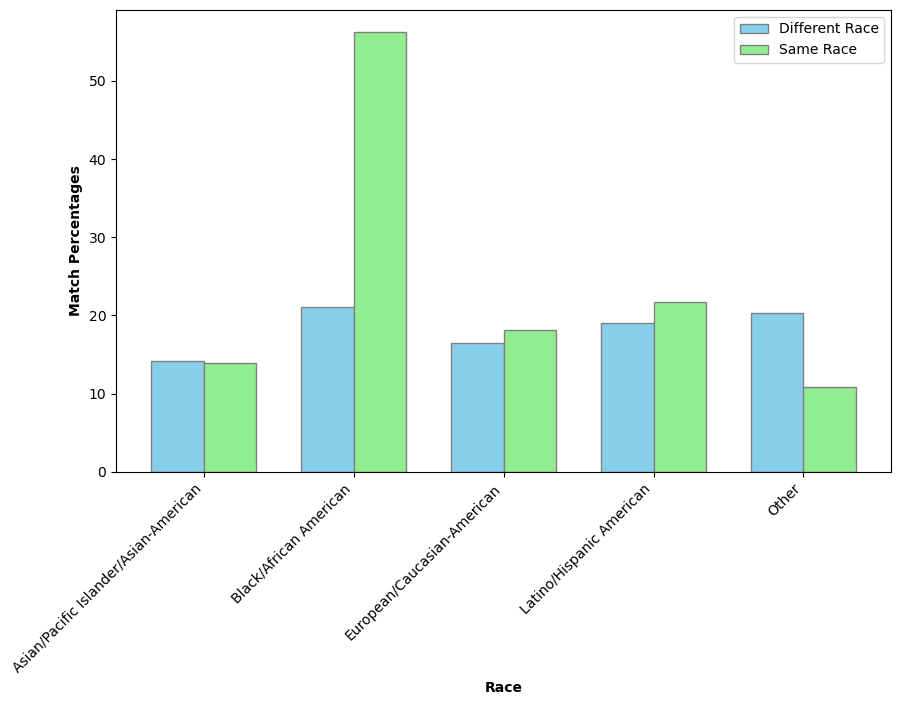

In [101]:
y = data_df.groupby(['Race_P1','SameRaceFlag']).agg(
    num_samples = ('IsMatch','count'),
    match_percentage = ('IsMatch','mean')
).reset_index()

# y_sorted = y.sort_values(by='Race_P1')

y['match_percentage'] = y['match_percentage']*100

y_pivot = y.pivot(index='Race_P1', columns='SameRaceFlag', values='match_percentage')

#display(y_pivot)
y_pivot = y_pivot.reset_index()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(y_pivot['Race_P1']))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, y_pivot[0], color='skyblue', width=bar_width, edgecolor='grey', label='Different Race')
plt.bar(r2, y_pivot[1], color='lightgreen', width=bar_width, edgecolor='grey', label='Same Race')

# Add labels and title
plt.xlabel('Race', fontweight='bold')
plt.ylabel('Match Percentages', fontweight='bold')
#plt.title('Multi Bar Chart', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(y_pivot['Race_P1']))], y_pivot['Race_P1'])

plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()

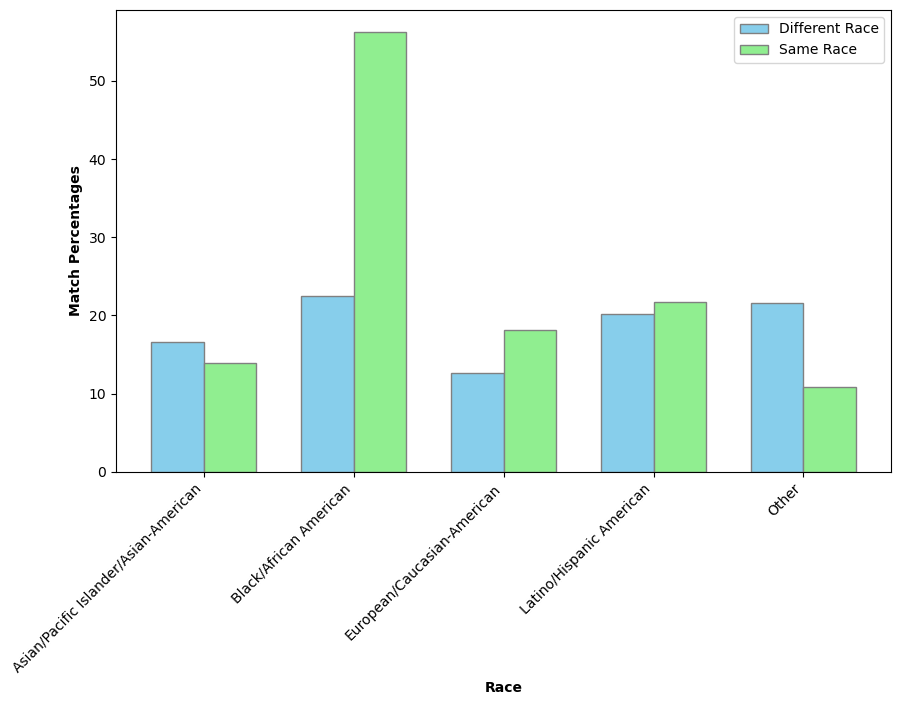

In [107]:
y = data_df.groupby(['Race_F','SameRaceFlag']).agg(
    num_samples = ('IsMatch','count'),
    match_percentage = ('IsMatch','mean')
).reset_index()

# y_sorted = y.sort_values(by='Race_P1')

y['match_percentage'] = y['match_percentage']*100

y_pivot = y.pivot(index='Race_F', columns='SameRaceFlag', values='match_percentage')

#display(y_pivot)
y_pivot = y_pivot.reset_index()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(y_pivot['Race_F']))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, y_pivot[0], color='skyblue', width=bar_width, edgecolor='grey', label='Different Race')
plt.bar(r2, y_pivot[1], color='lightgreen', width=bar_width, edgecolor='grey', label='Same Race')

# Add labels and title
plt.xlabel('Race', fontweight='bold')
plt.ylabel('Match Percentages', fontweight='bold')
#plt.title('Multi Bar Chart', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(y_pivot['Race_F']))], y_pivot['Race_F'])

plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [119]:
data_df['Age_M_minus_F'] = data_df['Age_M'] - data_df['Age_F']

#data_df

data_df.groupby(['Age_M_minus_F']).agg(
 num_samples = ('IsMatch','count'),
 is_match = ('IsMatch','mean')   
)

,num_samples,is_match
Age_M_minus_F,,
-32.0,3,0.000000
-28.0,2,0.000000
-22.0,6,0.000000
-16.0,1,0.000000
-15.0,3,0.000000
-14.0,13,0.153846
-13.0,8,0.125000
-12.0,12,0.166667
-11.0,29,0.000000


In [127]:
data_df.columns.tolist()

['Gender_P1',
 'Age_P1',
 'Age_P2',
 'Age Difference',
 'Race_P1',
 'Race_P2',
 'SameRaceFlag',
 'ImportanceSameRace_P1',
 'ImportanceSameReligion_P1',
 'FieldofStudy_P1',
 'AttractiveImportance_P2',
 'SincereImportance_P2',
 'IntelligenceImportance_P2',
 'FunnyImportance_P2',
 'AmbitiousImportance_P2',
 'SharedInterestImportance_P2',
 'AttractiveImportance_P1_P2',
 'SincereImportance_P1_P2',
 'IntelligenceImportance_P1_P2',
 'FunnyImportance_P1_P2',
 'AmbitiousImportance_P1_P2',
 'SharedInterestImportance_P1_P2',
 'Attractive_P1_P1',
 'Sincere_P1_P1',
 'Intelligence_P1_P1',
 'Funny_P1_P1',
 'Ambition_P1_P1',
 'Attractive_P2_P2',
 'Sincere_P2_P2',
 'Intelligence_P2_P2',
 'Funny_P2_P2',
 'Ambition_P2_P2',
 'SharedInterests_P2_P2',
 'sportsP1_P1',
 'tvsportsP1_P1',
 'exerciseP1_P1',
 'diningP1_P1',
 'museumsP1_P1',
 'artP1_P1',
 'hikingP1_P1',
 'gamingP1_P1',
 'clubbingP1_P1',
 'readingP1_P1',
 'tvP1_P1',
 'theaterP1_P1',
 'moviesP1_P1',
 'concertsP1_P1',
 'musicP1_P1',
 'shoppingP1_P1',

In [311]:
data_df['confidence_M'] = data_df['Attractive_M_M'] + data_df['Sincere_M_M'] + data_df['Intelligence_M_M'] + data_df['Funny_M_M'] + data_df['Ambition_M_M']


data_df['confidence_F'] = data_df['Attractive_F_F'] + data_df['Sincere_F_F'] + data_df['Intelligence_F_F'] + data_df['Funny_F_F'] + data_df['Ambition_F_F']


data_df['Confidence_Bucket_M'] = data_df['confidence_M'].apply(lambda a : "40-50" if a > 40 else "30-40" if a > 30 else "20-30" if a > 20 else "10-20" if a > 20 else "0-10" )


data_df['Confidence_Bucket_F'] = data_df['confidence_F'].apply(lambda a : "40-50" if a > 40 else "30-40" if a > 30 else "20-30" if a > 20 else "10-20" if a > 20 else "0-10" )

In [315]:
x = data_df.groupby(['Race_M','Confidence_Bucket_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x

,Race_M,Confidence_Bucket_M,match_perc
0,Asian/Pacific Islander/Asian-American,0-10,0.019231
1,Asian/Pacific Islander/Asian-American,20-30,0.065891
2,Asian/Pacific Islander/Asian-American,30-40,0.123995
3,Asian/Pacific Islander/Asian-American,40-50,0.184524
4,Black/African American,0-10,0.000000
5,Black/African American,20-30,0.000000
6,Black/African American,30-40,0.178344
7,Black/African American,40-50,0.291262
8,European/Caucasian-American,0-10,0.023529
9,European/Caucasian-American,20-30,0.065217


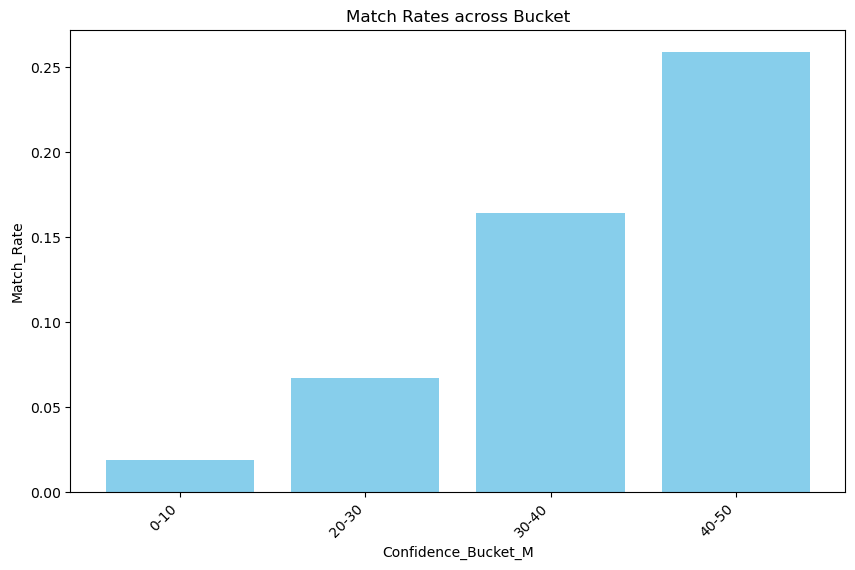

In [313]:
x = data_df.groupby(['Confidence_Bucket_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Confidence_Bucket_M'], x['match_perc'], color='skyblue')
plt.xlabel('Confidence_Bucket_M')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()




In [165]:
x = data_df.groupby(['Confidence_Bucket_M','Confidence_Bucket_F']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x

# # Plotting the bar graph
# plt.figure(figsize=(10, 6))
# plt.bar(x['Confidence_Bucket_F'], x['match_perc'], color='skyblue')
# plt.xlabel('Confidence_Bucket_F')
# plt.ylabel('Match_Rate')
# plt.title('Match Rates across Bucket')


# plt.xticks(rotation=45, ha='right')

# # # Adding labels directly on the bars
# # ax.bar_label(bars, fmt='%.2f')

# plt.show()




,Confidence_Bucket_M,Confidence_Bucket_F,match_perc
0,0-10,0-10,0.000000
1,0-10,20-30,0.000000
2,0-10,30-40,0.036585
3,0-10,40-50,0.000000
4,20-30,0-10,0.000000
5,20-30,20-30,0.053763
6,20-30,30-40,0.077834
7,20-30,40-50,0.051447
8,30-40,0-10,0.000000
9,30-40,20-30,0.045763


In [309]:
x = data_df.groupby(['confidence_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x

,confidence_M,match_perc
0,0.0,0.000000
1,5.0,0.000000
2,9.0,0.000000
3,10.0,0.000000
4,11.0,0.000000
5,12.0,0.000000
6,13.0,0.000000
7,14.0,0.000000
8,15.0,0.000000
9,16.0,0.000000


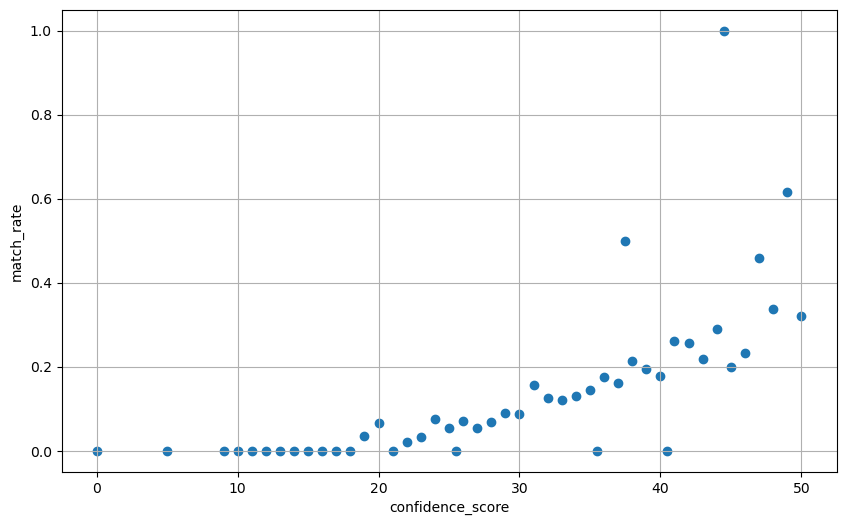

In [319]:
x = data_df.groupby(['confidence_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x



# Scatter Plot for ratings vs Avg Correct 
plt.figure(figsize=(10, 6))
plt.scatter(x['confidence_M'], x['match_perc'])
plt.xlabel('confidence_score')
plt.ylabel('match_rate')
plt.grid(True)
plt.show()

In [149]:
print(x['confidence_M'].corr(x['match_perc']))

0.6940757989533172


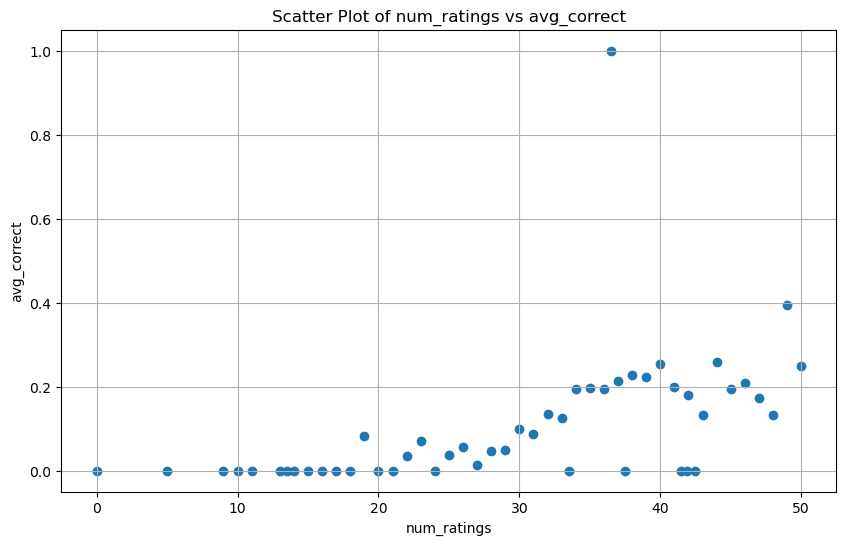

In [151]:
x = data_df.groupby(['confidence_F']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x



# Scatter Plot for ratings vs Avg Correct 
plt.figure(figsize=(10, 6))
plt.scatter(x['confidence_F'], x['match_perc'])
plt.title('Scatter Plot of num_ratings vs avg_correct')
plt.xlabel('num_ratings')
plt.ylabel('avg_correct')
plt.grid(True)
plt.show()

In [155]:
print(x['confidence_F'].corr(x['match_perc']))

0.5005488683796957


In [87]:
male_df = data_df[data_df['Gender_P1'] == 'male']
female_df = data_df[data_df['Gender_P1'] == 'female']

In [93]:
data_df.groupby(["Gender_P1"]).agg(
    avg_sports = ('sportsP1_P1','mean'),
    avg_tv_sports = ('tvsportsP1_P1', 'mean'),
    avg_exc =  ('exerciseP1_P1','mean'),
    avg_mus =   ('museumsP1_P1','mean'),
    avg_dining = ('diningP1_P1','mean'),
    avg_art = ('artP1_P1','mean'),
    avg_hiking  = ('hikingP1_P1', 'mean'),
    avg_gaming = ('gamingP1_P1', 'mean'),
    avg_clubbing = ('clubbingP1_P1', 'mean'),
    avg_reading = ('readingP1_P1', 'mean'),
    avg_tv =('tvP1_P1', 'mean'),
    avg_theater = ('theaterP1_P1', 'mean'),
    avg_movies = ('moviesP1_P1', 'mean'),
    avg_concerts = ('concertsP1_P1', 'mean'),
    avg_music = ('musicP1_P1', 'mean'),
    avg_shopping = ('shoppingP1_P1', 'mean'),
    avg_yoga = ('yogaP1_P1', 'mean')
    
)

,avg_sports,avg_tv_sports,avg_exc,avg_mus,avg_dining,avg_art,avg_hiking,avg_gaming,avg_clubbing,avg_reading,avg_tv,avg_theater,avg_movies,avg_concerts,avg_music,avg_shopping,avg_yoga
Gender_P1,,,,,,,,,,,,,,,,,
female,5.881010,4.171274,6.510517,7.508113,8.231070,7.303185,5.848257,3.337139,5.946214,7.959135,5.816106,7.500601,8.200421,7.110276,7.998498,6.636719,4.944411
male,7.009012,4.984302,6.017733,6.578779,7.460465,6.227035,5.447093,4.430814,5.593605,7.461628,4.877907,6.083430,7.659012,6.554360,7.724709,4.809012,3.756686


In [113]:
data_df.groupby(["Race_P1","Gender_P1"]).agg(
    avg_sports = ('sportsP1_P1','mean'),
    avg_tv_sports = ('tvsportsP1_P1', 'mean'),
    avg_exc =  ('exerciseP1_P1','mean'),
    avg_mus =   ('museumsP1_P1','mean'),
    avg_dining = ('diningP1_P1','mean'),
    avg_art = ('artP1_P1','mean'),
    avg_hiking  = ('hikingP1_P1', 'mean'),
    avg_gaming = ('gamingP1_P1', 'mean'),
    avg_clubbing = ('clubbingP1_P1', 'mean'),
    avg_reading = ('readingP1_P1', 'mean'),
    avg_tv =('tvP1_P1', 'mean'),
    avg_theater = ('theaterP1_P1', 'mean'),
    avg_movies = ('moviesP1_P1', 'mean'),
    avg_concerts = ('concertsP1_P1', 'mean'),
    avg_music = ('musicP1_P1', 'mean'),
    avg_shopping = ('shoppingP1_P1', 'mean'),
    avg_yoga = ('yogaP1_P1', 'mean')
    
)

avg_sports  avg_tv_sports  \
Race_P1                               Gender_P1                              
Asian/Pacific Islander/Asian-American female       5.937149       4.784512   
                                      male         6.485861       5.515424   
Black/African American                female       4.722222       4.277778   
                                      male         8.021429       6.142857   
European/Caucasian-American           female       5.941008       3.925544   
                                      male         7.146389       4.614154   
Latino/Hispanic American              female       5.964664       3.745583   
                                      male         6.826484       4.890411   
Other                                 female       6.123810       4.085714   
                                      male         7.100000       5.854167   

                                                  avg_exc   avg_mus  \
Race_P1                               Gender_P1                       
Asian/Pacific Islander/Asian-American female     5.865320  7.482604   
                                      male       5.742931  6.106684   
Black/African American                female     5.308081  6.595960   
                                      male       7.035714  6.221429   
European/Caucasian-American           female     7.064719  7.558419   
                                      male       6.015027  6.620940   
Latino/Hispanic American              female     6.286219  7.593640   
                                      male       6.214612  7.127854   
Other                                 female     6.076190  7.942857   
                                      male       6.158333  7.454167   

                                                 avg_dining   avg_art  \
Race_P1                               Gender_P1                         
Asian/Pacific Islander/Asian-American female       8.356902  7.426487   
                                      male         7.718509  5.867609   
Black/African American                female       8.383838  6.505051   
                                      male         6.800000  5.185714   
European/Caucasian-American           female       8.160939  7.353952   
                                      male         7.234125  6.342220   
Latino/Hispanic American              female       8.144876  6.954064   
                                      male         8.328767  6.155251   
Other                                 female       8.252381  7.580952   
                                      male         8.162500  7.075000   

                                                 avg_hiking  avg_gaming  \
Race_P1                               Gender_P1                           
Asian/Pacific Islander/Asian-American female       5.748597    3.446689   
                                      male         5.381748    5.299486   
Black/African American                female       5.404040    3.282828   
                                      male         3.800000    4.978571   
European/Caucasian-American           female       5.840779    3.210767   
                                      male         5.519632    3.920504   
Latino/Hispanic American              female       5.989399    3.551237   
                                      male         5.246575    4.315068   
Other                                 female       6.561905    3.685714   
                                      male         6.179167    5.787500   

                                                 avg_clubbing  avg_reading  \
Race_P1                               Gender_P1                              
Asian/Pacific Islander/Asian-American female         6.042649     7.888889   
                                      male           5.550129     7.120823   
Black/African American                female         6.843434     7.212121   
                                      male           7.871429     8.400000   
European/Cauc

1. 

In [95]:
data_df.groupby(['IsMatch']).agg(mean_corr = ('IntresetinCorrelation','mean'))

,mean_corr
IsMatch,
0,0.194806
1,0.218262


In [101]:
data_df.groupby(['SameRaceFlag']).agg(mean_corr = ('IsMatch','mean'),mean_count = ('IsMatch','count'))

,mean_corr,mean_count
SameRaceFlag,,
0,0.168020,4065
1,0.177211,2703


In [103]:
data_df.groupby(['Race_P1','SameRaceFlag']).agg(mean_corr = ('IsMatch','mean'),mean_count = ('IsMatch','count'))

mean_corr  mean_count
Race_P1                               SameRaceFlag                       
Asian/Pacific Islander/Asian-American 0              0.141139        1247
                                      1              0.139810         422
Black/African American                0              0.211180         322
                                      1              0.562500          16
European/Caucasian-American           0              0.164720        1627
                                      1              0.181943        2182
Latino/Hispanic American              0              0.190789         456
                                      1              0.217391          46
Other                                 0              0.203390         413
                                      1              0.108108          37

In [109]:
data_df.groupby(['Race_P2','SameRaceFlag']).agg(mean_corr = ('IsMatch','mean'),mean_count = ('IsMatch','count'))

mean_corr  mean_count
Race_P2                               SameRaceFlag                       
Asian/Pacific Islander/Asian-American 0              0.148637        1211
                                      1              0.139810         422
Black/African American                0              0.200590         339
                                      1              0.562500          16
European/Caucasian-American           0              0.155611        1613
                                      1              0.181943        2182
Latino/Hispanic American              0              0.186992         492
                                      1              0.217391          46
Other                                 0              0.224390         410
                                      1              0.108108          37

1. Is being same race important -  should we show profiles with same races ? Is this belief changing with age ?
2. Is Age difference a factor ? - Male age more ; female age less ? what pattern do we observe ?
3. Age across races ?
4. Is shared interest/ values important ? If yes ? Which interest/value is important ? (Is being funny impotant ?)
5. Are confident people getting more matches ? (Rating yourself highly)


In [169]:
data_df.columns

Index(['Gender_P1', 'Age_P1', 'Age_P2', 'Age Difference', 'Race_P1', 'Race_P2',
       'SameRaceFlag', 'ImportanceSameRace_P1', 'ImportanceSameReligion_P1',
       'FieldofStudy_P1', 'AttractiveImportance_P2', 'SincereImportance_P2',
       'IntelligenceImportance_P2', 'FunnyImportance_P2',
       'AmbitiousImportance_P2', 'SharedInterestImportance_P2',
       'AttractiveImportance_P1_P2', 'SincereImportance_P1_P2',
       'IntelligenceImportance_P1_P2', 'FunnyImportance_P1_P2',
       'AmbitiousImportance_P1_P2', 'SharedInterestImportance_P1_P2',
       'Attractive_P1_P1', 'Sincere_P1_P1', 'Intelligence_P1_P1',
       'Funny_P1_P1', 'Ambition_P1_P1', 'Attractive_P2_P2', 'Sincere_P2_P2',
       'Intelligence_P2_P2', 'Funny_P2_P2', 'Ambition_P2_P2',
       'SharedInterests_P2_P2', 'sportsP1_P1', 'tvsportsP1_P1',
       'exerciseP1_P1', 'diningP1_P1', 'museumsP1_P1', 'artP1_P1',
       'hikingP1_P1', 'gamingP1_P1', 'clubbingP1_P1', 'readingP1_P1',
       'tvP1_P1', 'theaterP1_P1', 'movie

In [191]:
data_df['AttractiveImportance_Delta'] = abs( data_df['AttractiveImportance_M_M'] - data_df['AttractiveImportance_F_F'])

data_df['SincereImportance_Delta'] = abs( data_df['SincereImportance_M_M'] - data_df['SincereImportance_F_F'])

data_df['IntelligenceImportance_Delta'] = abs( data_df['IntelligenceImportance_M_M'] - data_df['IntelligenceImportance_F_F'])

data_df['AmbitiousImportance_Delta'] = abs( data_df['AmbitiousImportance_M_M'] - data_df['AmbitiousImportance_F_F'])

data_df['SharedInterestImportance_Delta'] = abs( data_df['SharedInterestImportance_M_M'] - data_df['SharedInterestImportance_F_F'])


data_df['Total_Imp_Delta'] = data_df['AttractiveImportance_Delta'] + data_df['SincereImportance_Delta'] + data_df['IntelligenceImportance_Delta'] + data_df['AmbitiousImportance_Delta'] + data_df['SharedInterestImportance_M_M']

data_df['Total_Imp_Delta_Bucket'] = data_df['Total_Imp_Delta'].apply(lambda a : "160-200" if a > 160 else "120-160" if a > 120 else "80-120" if a > 80 else "40-80" if a > 40 else "0-40" )

In [195]:
x = data_df.groupby(['Total_Imp_Delta_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'Total_Imp_Delta_Bucket')


x


#print(x['Total_Imp_Delta'].corr(x['match_perc']))

,Total_Imp_Delta_Bucket,match_perc
0,0-40,0.185034
1,120-160,0.275000
2,40-80,0.148243
3,80-120,0.205607


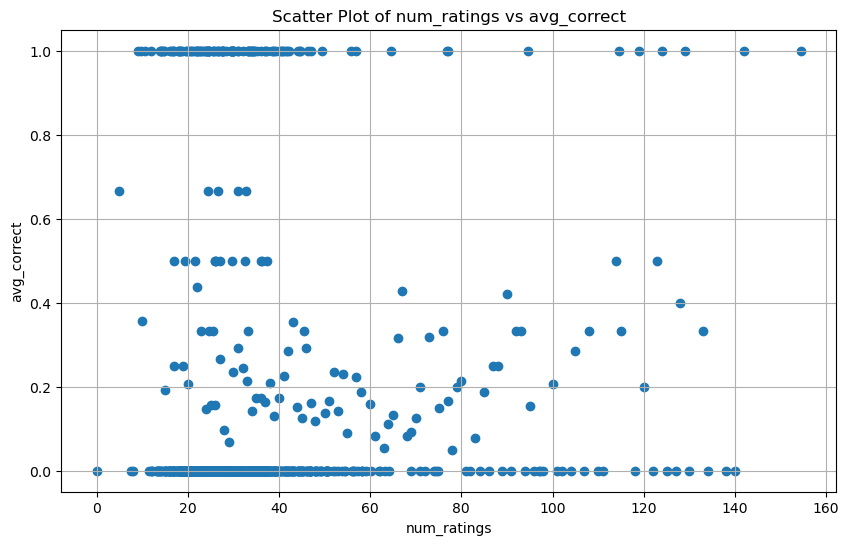

In [189]:
x = data_df.groupby(['Total_Imp_Delta']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()



# Scatter Plot for ratings vs Avg Correct 
plt.figure(figsize=(10, 6))
plt.scatter(x['Total_Imp_Delta'], x['match_perc'])
plt.title('Scatter Plot of num_ratings vs avg_correct')
plt.xlabel('num_ratings')
plt.ylabel('avg_correct')
plt.grid(True)
plt.show()

In [179]:
x = data_df.groupby(['AttractiveImportance_Delta']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()
print(x['AttractiveImportance_Delta'].corr(x['match_perc']))

0.07490254016637579


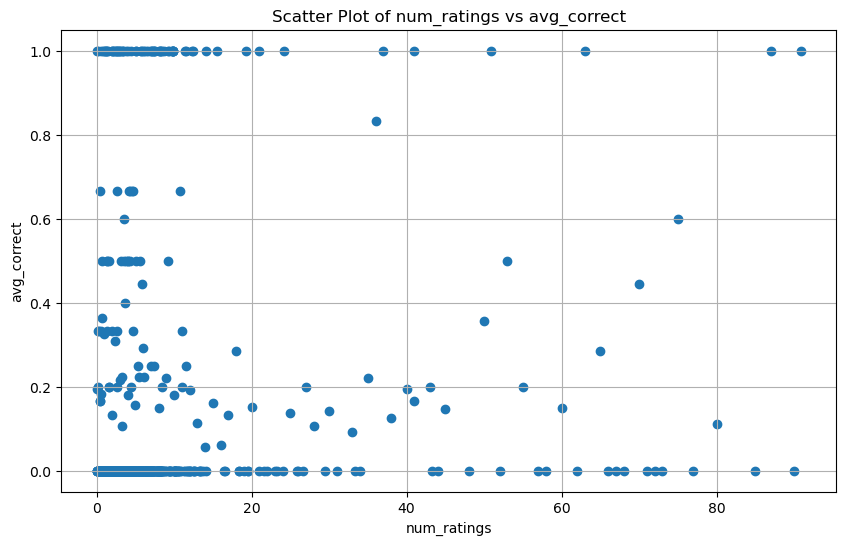

In [177]:
x = data_df.groupby(['AttractiveImportance_Delta']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x



# Scatter Plot for ratings vs Avg Correct 
plt.figure(figsize=(10, 6))
plt.scatter(x['AttractiveImportance_Delta'], x['match_perc'])
plt.title('Scatter Plot of num_ratings vs avg_correct')
plt.xlabel('num_ratings')
plt.ylabel('avg_correct')
plt.grid(True)
plt.show()

In [3]:
# Data is tab seperated using 'comma' and naming columns manually as the data doesn't have headers
clean_df = pd.read_csv("GroupPresentationData.csv")

In [7]:
clean_df.columns

Index(['RowCount', 'Gender_P1', 'Age_P1', 'Age_P2', 'Age Difference',
       'Race_P1', 'Race_P2', 'SameRaceFlag', 'ImportanceSameRace_P1',
       'ImportanceSameReligion_P1', 'FieldofStudy_P1',
       'AttractiveImportance_P2', 'SincereImportance_P2',
       'IntelligenceImportance_P2', 'FunnyImportance_P2',
       'AmbitiousImportance_P2', 'SharedInterestImportance_P2',
       'AttractiveImportance_P1_P2', 'SincereImportance_P1_P2',
       'IntelligenceImportance_P1_P2', 'FunnyImportance_P1_P2',
       'AmbitiousImportance_P1_P2', 'SharedInterestImportance_P1_P2',
       'Attractive_P1_P1', 'Sincere_P1_P1', 'Intelligence_P1_P1',
       'Funny_P1_P1', 'Ambition_P1_P1', 'Attractive_P2_P2', 'Sincere_P2_P2',
       'Intelligence_P2_P2', 'Funny_P2_P2', 'Ambition_P2_P2',
       'SharedInterests_P2_P2', 'AttractiveDelta', 'SincereDelta',
       'IntelligenceDelta', 'FunnyDelta', 'AmbitionDelta',
       'SharedInterestsDelta', 'Personality Similarity', 'SimilarityBucket',
       'sportsP1_P1

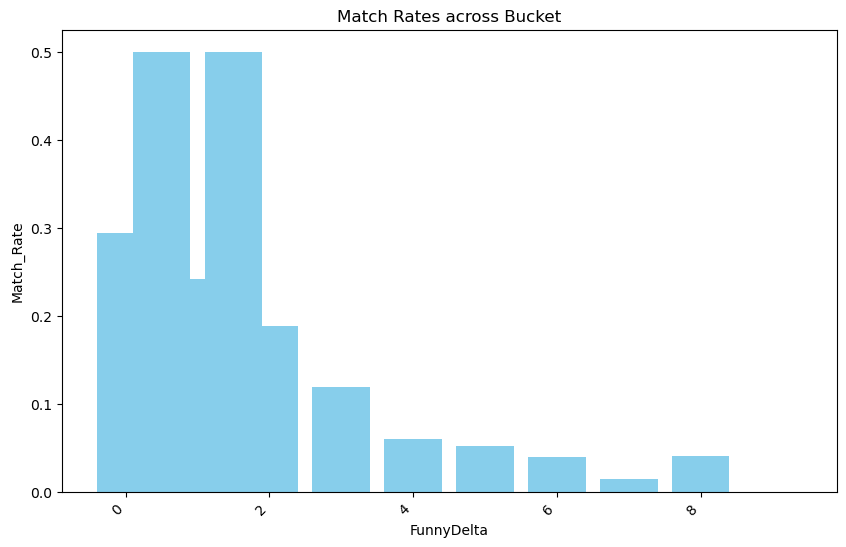

In [33]:
x = clean_df.groupby(['FunnyDelta']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'FunnyDelta')


x 


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['FunnyDelta'], x['match_perc'], color='skyblue')
plt.xlabel('FunnyDelta')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()

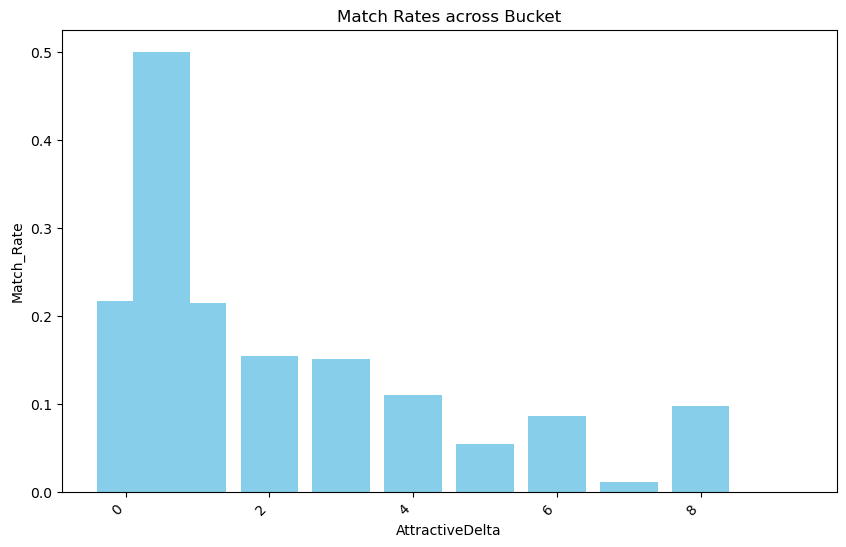

In [31]:
x = clean_df.groupby(['AttractiveDelta']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'AttractiveDelta')


x 


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['AttractiveDelta'], x['match_perc'], color='skyblue')
plt.xlabel('AttractiveDelta')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()

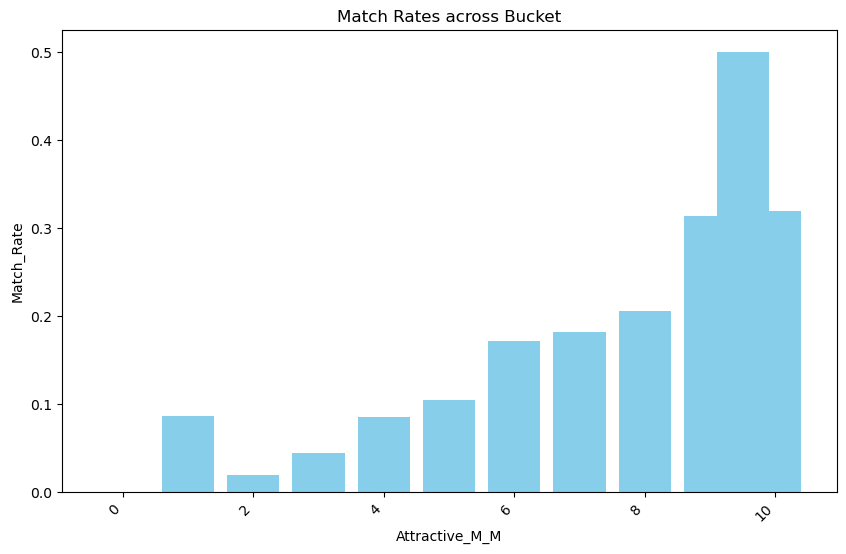

In [27]:
x = clean_df.groupby(['Attractive_M_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'Attractive_M_M')


x 


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Attractive_M_M'], x['match_perc'], color='skyblue')
plt.xlabel('Attractive_M_M')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()

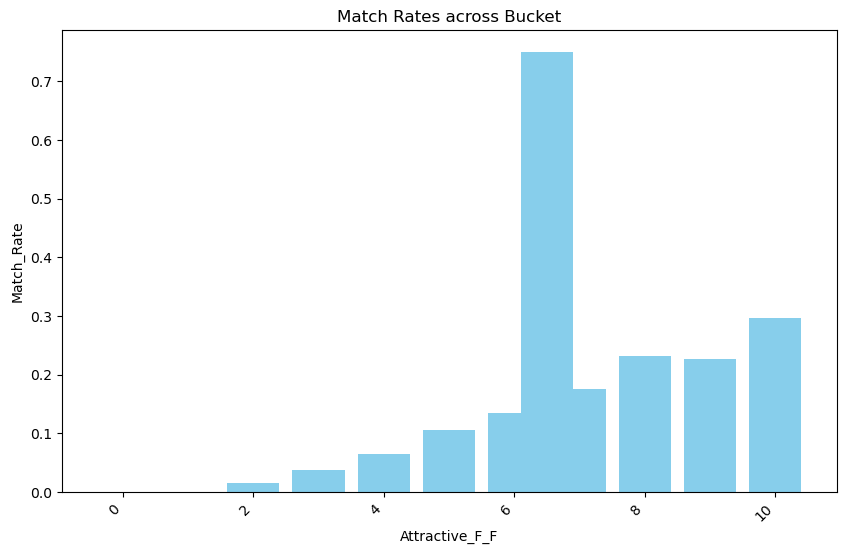

In [29]:
x = clean_df.groupby(['Attractive_F_F']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'Attractive_F_F')


x 


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Attractive_F_F'], x['match_perc'], color='skyblue')
plt.xlabel('Attractive_F_F')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()

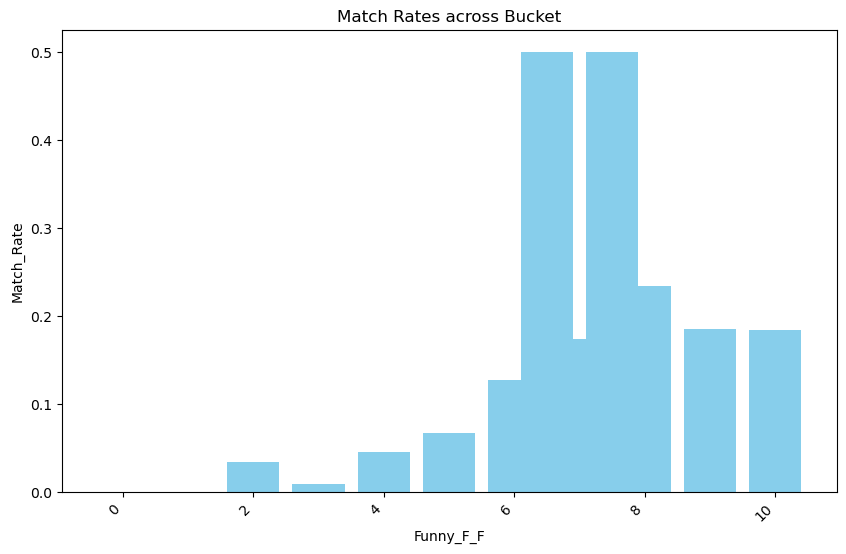

In [15]:
x = clean_df.groupby(['Funny_F_F']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'Funny_F_F')


x 


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Funny_F_F'], x['match_perc'], color='skyblue')
plt.xlabel('Funny_F_F')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()

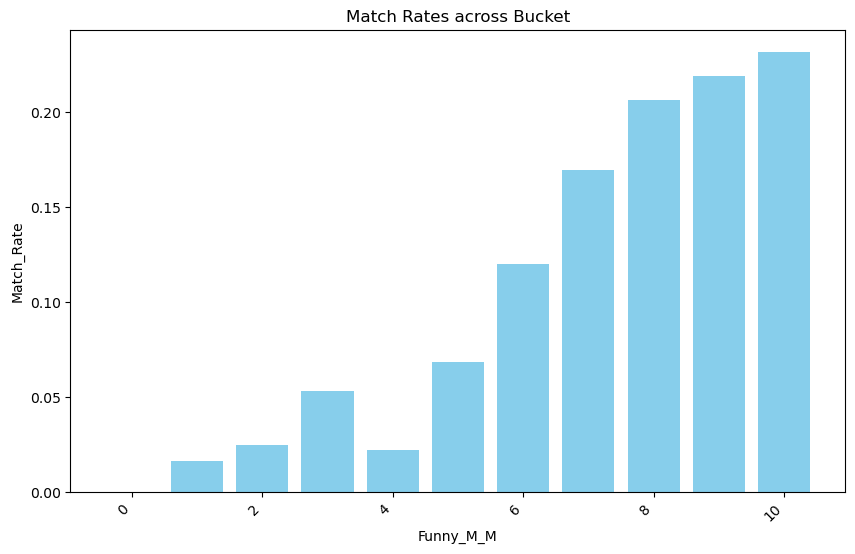

In [17]:
x = clean_df.groupby(['Funny_M_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'Funny_M_M')


x 


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Funny_M_M'], x['match_perc'], color='skyblue')
plt.xlabel('Funny_M_M')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()

In [25]:
x = clean_df.groupby(['Funny_M_M','Funny_F_F']).agg(
    match_perc = ('IsMatch','mean')
).reset_index().sort_values(by = 'Funny_M_M')


x[x['Funny_M_M'].isin([6,7,8])].sort_values(by='match_perc', ascending = False)

,Funny_M_M,Funny_F_F,match_perc
62,8,7.5,1.000000
60,8,6.5,1.000000
63,8,8.0,0.313472
64,8,9.0,0.295547
35,6,3.0,0.250000
51,7,8.0,0.232376
65,8,10.0,0.212329
50,7,7.0,0.202532
61,8,7.0,0.167763
49,7,6.0,0.163636


In [211]:
clean_df[['ValuesDelta','Similar_Values_Bucket']].drop_duplicates().sort_values(by='ValuesDelta')

,ValuesDelta,Similar_Values_Bucket
898,0.00,>90%
2319,2.39,>90%
2734,2.88,0% - 10%
2224,2.97,>90%
5153,3.00,>90%
...,...,...
4904,143.00,0% - 10%
4677,146.00,0% - 10%
69,150.00,0% - 10%
9,155.00,0% - 10%


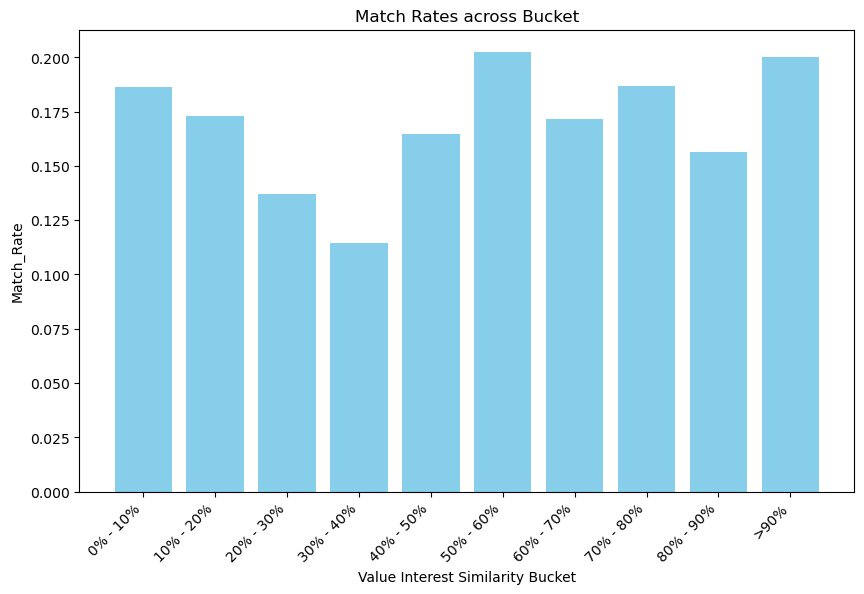

In [331]:
# All Races ----
x = clean_df.groupby(['Similar_Values_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

#x = x[x['Race_M'] == "Asian/Pacific Islander/Asian-American"] 

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Similar_Values_Bucket'], x['match_perc'], color='skyblue')
plt.xlabel('Value Interest Similarity Bucket')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()


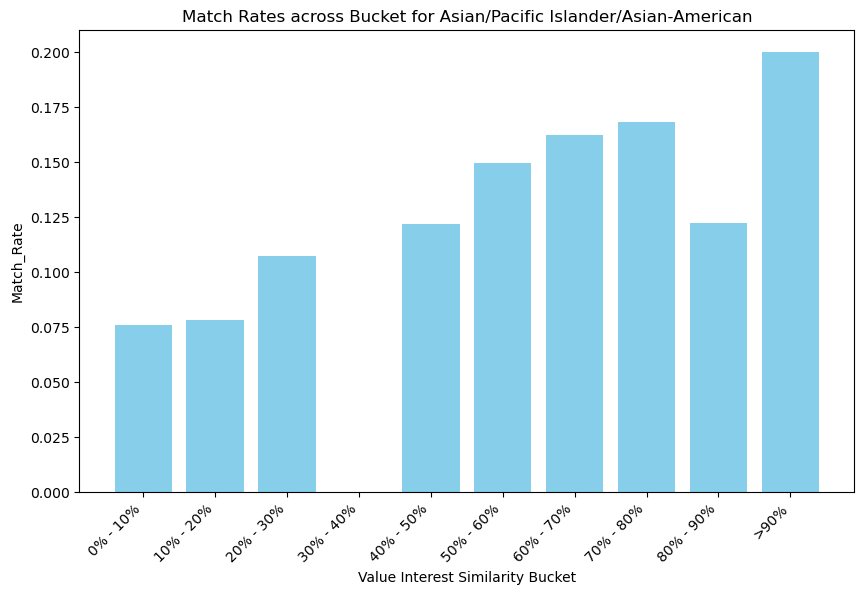

In [333]:

x = clean_df.groupby(['Race_M','Similar_Values_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x = x[x['Race_M'] == "Asian/Pacific Islander/Asian-American"] 

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Similar_Values_Bucket'], x['match_perc'], color='skyblue')
plt.xlabel('Value Interest Similarity Bucket')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket for Asian/Pacific Islander/Asian-American')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()


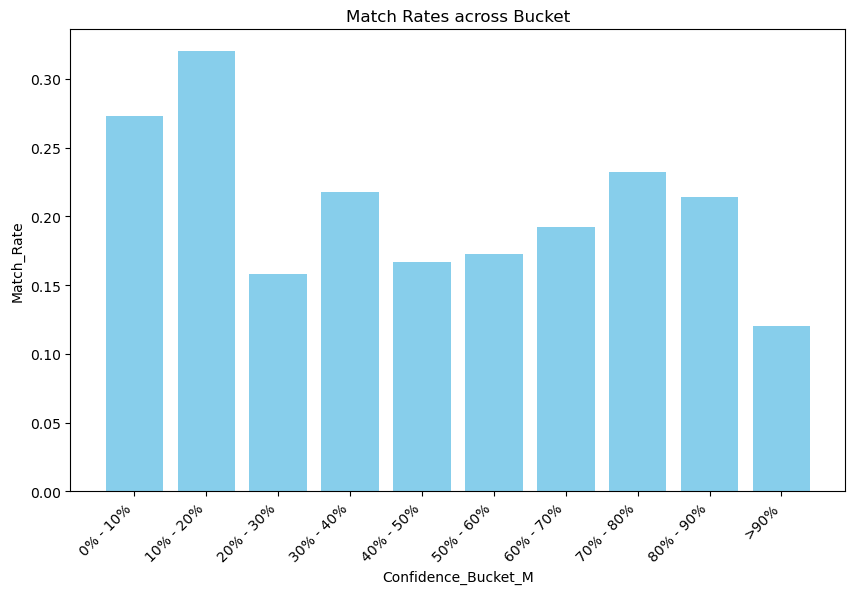

In [267]:

x = clean_df.groupby(['Race_M','Similar_Values_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x = x[x['Race_M'] == "Other"] 

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Similar_Values_Bucket'], x['match_perc'], color='skyblue')
plt.xlabel('Confidence_Bucket_M')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()


In [235]:
x = clean_df.groupby(['ValuesDelta','Race_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

#x = clean_df

a = x[x['Race_M'] == "European/Caucasian-American"] 
print(a['ValuesDelta'].corr(a['match_perc']))



b = x[x['Race_M'] == "Asian/Pacific Islander/Asian-American"] 
print(b['ValuesDelta'].corr(b['match_perc']))


c = x[x['Race_M'] == "Black/African American"] 
print(c['ValuesDelta'].corr(c['match_perc']))


d = x[x['Race_M'] == "Latino/Hispanic American"]
print(d['ValuesDelta'].corr(d['match_perc']))



e = x[x['Race_M'] == "Other"]
print(e['ValuesDelta'].corr(e['match_perc']))








0.04854501975384049
-0.16868196600444743
-0.011167347744543893
0.09989433252686757
0.19499044716115294


In [243]:
clean_df.columns

Index(['RowCount', 'Gender_P1', 'Age_P1', 'Age_P2', 'Age Difference',
       'Race_P1', 'Race_P2', 'SameRaceFlag', 'ImportanceSameRace_P1',
       'ImportanceSameReligion_P1', 'FieldofStudy_P1',
       'AttractiveImportance_P2', 'SincereImportance_P2',
       'IntelligenceImportance_P2', 'FunnyImportance_P2',
       'AmbitiousImportance_P2', 'SharedInterestImportance_P2',
       'AttractiveImportance_P1_P2', 'SincereImportance_P1_P2',
       'IntelligenceImportance_P1_P2', 'FunnyImportance_P1_P2',
       'AmbitiousImportance_P1_P2', 'SharedInterestImportance_P1_P2',
       'Attractive_P1_P1', 'Sincere_P1_P1', 'Intelligence_P1_P1',
       'Funny_P1_P1', 'Ambition_P1_P1', 'Attractive_P2_P2', 'Sincere_P2_P2',
       'Intelligence_P2_P2', 'Funny_P2_P2', 'Ambition_P2_P2',
       'SharedInterests_P2_P2', 'AttractiveDelta', 'SincereDelta',
       'IntelligenceDelta', 'FunnyDelta', 'AmbitionDelta',
       'SharedInterestsDelta', 'Personality Similarity', 'SimilarityBucket',
       'sportsP1_P1

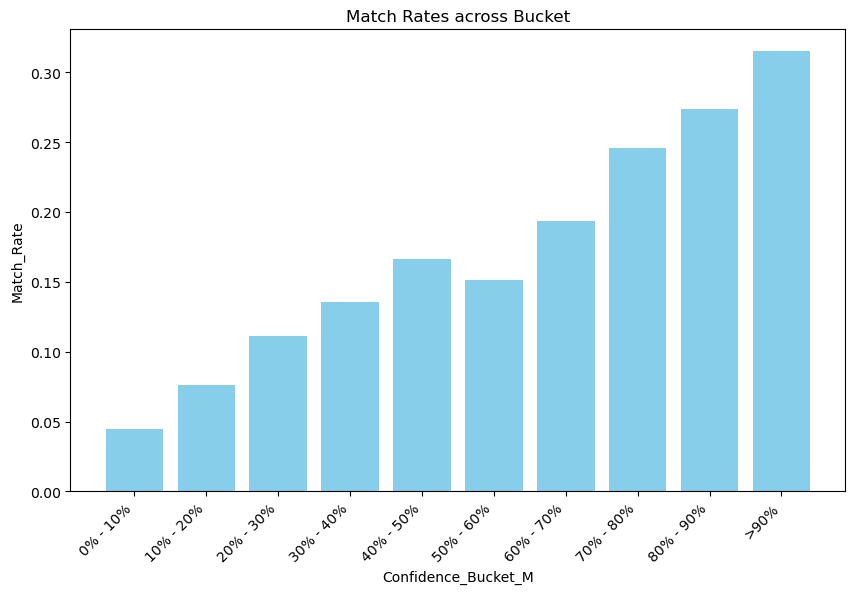

In [245]:
x = clean_df.groupby(['SimilarityBucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()



# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['SimilarityBucket'], x['match_perc'], color='skyblue')
plt.xlabel('Confidence_Bucket_M')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()


In [285]:


x = clean_df.groupby(['Similar_Values_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

x

,Similar_Values_Bucket,match_perc
0,0% - 10%,0.186275
1,10% - 20%,0.173104
2,20% - 30%,0.137255
3,30% - 40%,0.114338
4,40% - 50%,0.164885
5,50% - 60%,0.202703
6,60% - 70%,0.171527
7,70% - 80%,0.186736
8,80% - 90%,0.156425
9,>90%,0.200000


In [283]:


#clean_df['Age_M'].drop_duplicates().sort_values()


clean_df['Age_Bucket'] = clean_df['Age_M'].apply(lambda a : "35+" if a > 35 else "30-35" if a > 30 else "25-30" if a > 25 else "22-25" if a > 22 else "18-21" )

x = clean_df.groupby(['Age_Bucket','Similar_Values_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

# # Plotting the bar graph
# plt.figure(figsize=(10, 6))
# plt.bar(x['SimilarityBucket'], x['match_perc'], color='skyblue')
# plt.xlabel('Confidence_Bucket_M')
# plt.ylabel('Match_Rate')
# plt.title('Match Rates across Bucket')


# plt.xticks(rotation=45, ha='right')

# # # Adding labels directly on the bars
# # ax.bar_label(bars, fmt='%.2f')

# plt.show()

x

,Age_Bucket,Similar_Values_Bucket,match_perc
0,18-21,0% - 10%,0.145161
1,18-21,10% - 20%,0.074074
2,18-21,20% - 30%,0.126126
3,18-21,30% - 40%,0.185714
4,18-21,40% - 50%,0.141026
5,18-21,50% - 60%,0.291667
6,18-21,60% - 70%,0.111111
7,18-21,70% - 80%,0.265306
8,18-21,80% - 90%,0.238095
9,18-21,>90%,0.333333


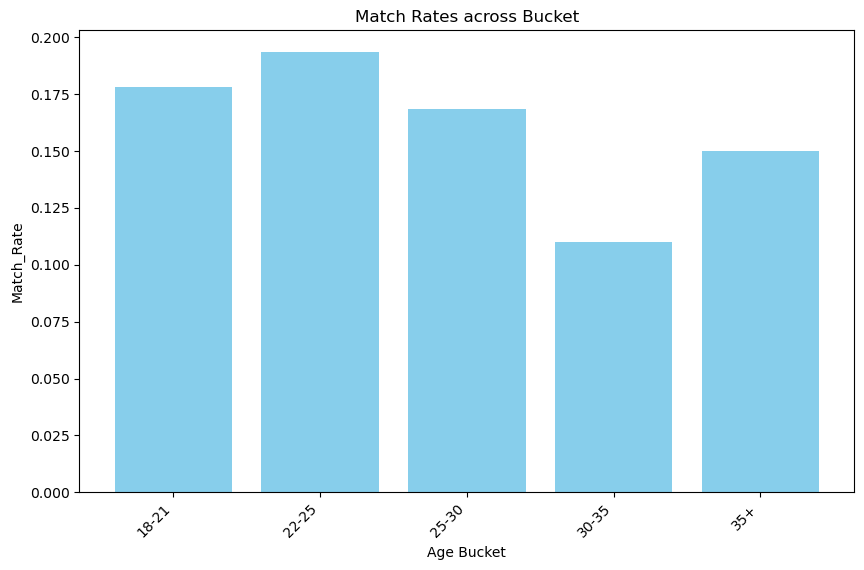

In [293]:


#clean_df['Age_M'].drop_duplicates().sort_values()

clean_df['Age_Bucket'] = clean_df['Age_M'].apply(lambda a : "35+" if a > 35 else "30-35" if a > 30 else "25-30" if a > 25 else "22-25" if a > 22 else "18-21" )

x = clean_df.groupby(['Age_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Age_Bucket'], x['match_perc'], color='skyblue')
plt.xlabel('Age Bucket')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()



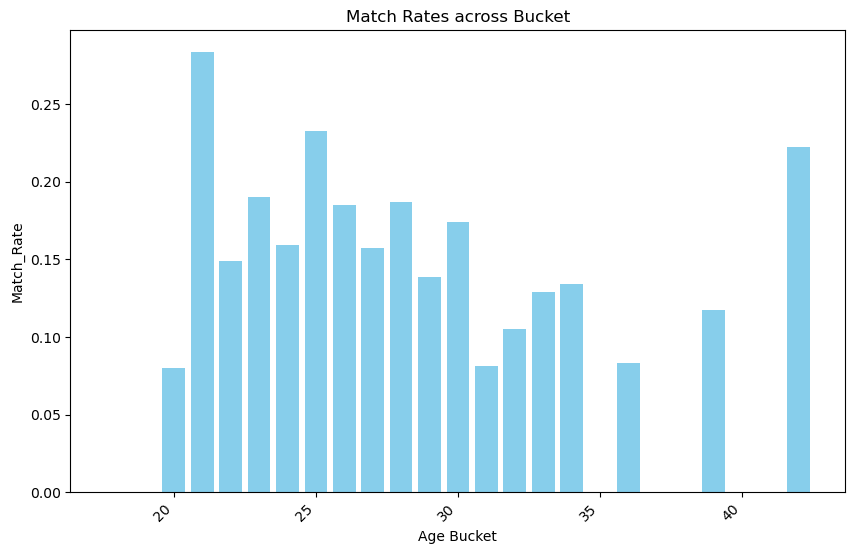

In [295]:


#clean_df['Age_M'].drop_duplicates().sort_values()

clean_df['Age_Bucket'] = clean_df['Age_M'].apply(lambda a : "35+" if a > 35 else "30-35" if a > 30 else "25-30" if a > 25 else "22-25" if a > 22 else "18-21" )

x = clean_df.groupby(['Age_M']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Age_M'], x['match_perc'], color='skyblue')
plt.xlabel('Age Bucket')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()



In [303]:
clean_df['Age_Bucket'] = clean_df['Age_F'].apply(lambda a : "35+" if a > 35 else "30-35" if a > 30 else "25-30" if a > 25 else "22-25" if a > 22 else "18-21" )

x = clean_df.groupby(['Age_Bucket']).agg(
    num_samples = ('IsMatch','count'),
    match_perc = ('IsMatch','mean')
).reset_index()

x

,Age_Bucket,num_samples,match_perc
0,18-21,979,0.187947
1,22-25,2411,0.174616
2,25-30,2735,0.167093
3,30-35,577,0.157712
4,35+,66,0.136364


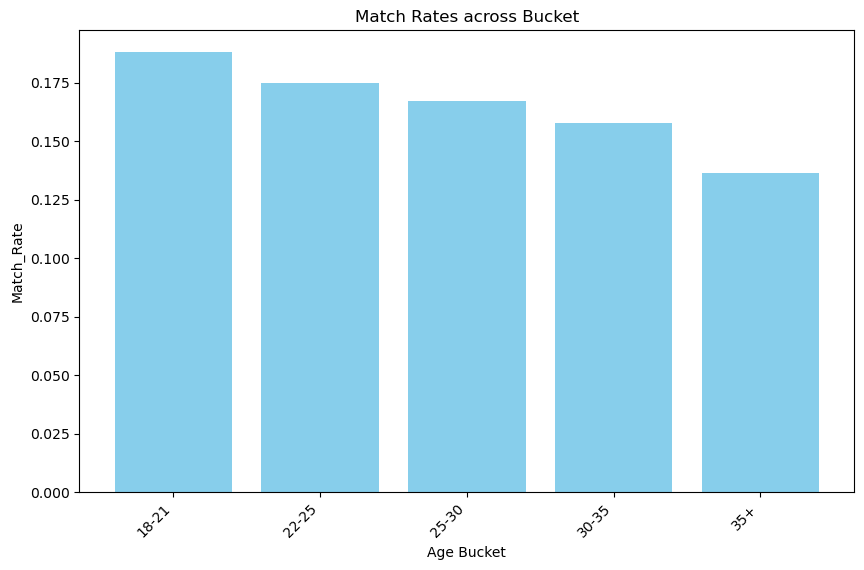

In [297]:


#clean_df['Age_M'].drop_duplicates().sort_values()

clean_df['Age_Bucket'] = clean_df['Age_F'].apply(lambda a : "35+" if a > 35 else "30-35" if a > 30 else "25-30" if a > 25 else "22-25" if a > 22 else "18-21" )

x = clean_df.groupby(['Age_Bucket']).agg(
    match_perc = ('IsMatch','mean')
).reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Age_Bucket'], x['match_perc'], color='skyblue')
plt.xlabel('Age Bucket')
plt.ylabel('Match_Rate')
plt.title('Match Rates across Bucket')


plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()



In [305]:
clean_df['IsMatch'].value_counts()

IsMatch
0    5606
1    1162
Name: count, dtype: int64

In [323]:
clean_df.columns

Index(['RowCount', 'Gender_P1', 'Age_P1', 'Age_P2', 'Age Difference',
       'Race_P1', 'Race_P2', 'SameRaceFlag', 'ImportanceSameRace_P1',
       'ImportanceSameReligion_P1', 'FieldofStudy_P1',
       'AttractiveImportance_P2', 'SincereImportance_P2',
       'IntelligenceImportance_P2', 'FunnyImportance_P2',
       'AmbitiousImportance_P2', 'SharedInterestImportance_P2',
       'AttractiveImportance_P1_P2', 'SincereImportance_P1_P2',
       'IntelligenceImportance_P1_P2', 'FunnyImportance_P1_P2',
       'AmbitiousImportance_P1_P2', 'SharedInterestImportance_P1_P2',
       'Attractive_P1_P1', 'Sincere_P1_P1', 'Intelligence_P1_P1',
       'Funny_P1_P1', 'Ambition_P1_P1', 'Attractive_P2_P2', 'Sincere_P2_P2',
       'Intelligence_P2_P2', 'Funny_P2_P2', 'Ambition_P2_P2',
       'SharedInterests_P2_P2', 'AttractiveDelta', 'SincereDelta',
       'IntelligenceDelta', 'FunnyDelta', 'AmbitionDelta',
       'SharedInterestsDelta', 'Personality Similarity', 'SimilarityBucket',
       'sportsP1_P1

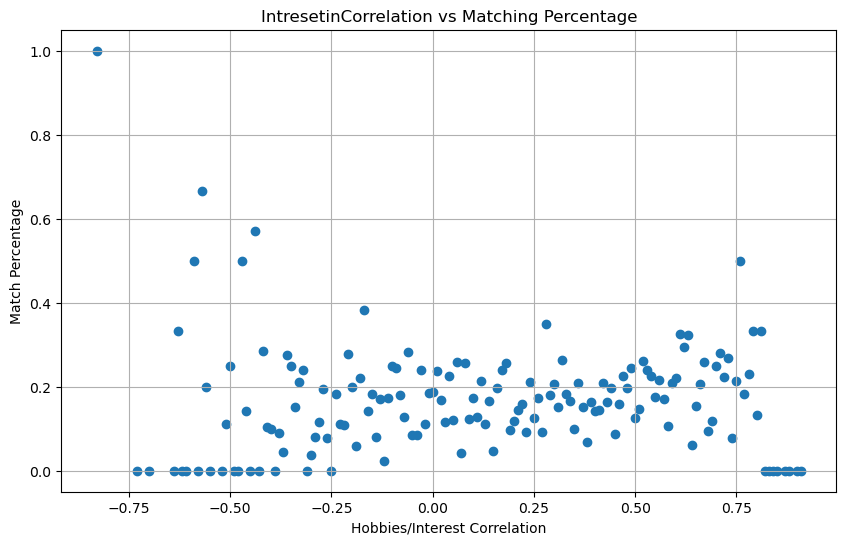

In [35]:
x = clean_df.groupby(['IntresetinCorrelation']).agg(
    match_perc = ('IsMatch', 'mean')
).reset_index()

x


# Scatter Plot for ratings vs Avg Correct 
plt.figure(figsize=(10, 6))
plt.scatter(x['IntresetinCorrelation'], x['match_perc'])
plt.title('IntresetinCorrelation vs Matching Percentage')
plt.xlabel('Hobbies/Interest Correlation')
plt.ylabel('Match Percentage')
plt.grid(True)
plt.show()

In [ ]:
x = clean_df.groupby(['IntresetinCorrelation']).agg(
    match_perc = ('IsMatch', 'mean')
).reset_index()

x


# Scatter Plot for ratings vs Avg Correct 
plt.figure(figsize=(10, 6))
plt.scatter(x['IntresetinCorrelation'], x['match_perc'])
plt.title('IntresetinCorrelation vs Matching Percentage')
plt.xlabel('Hobbies/Interest Correlation')
plt.ylabel('Match Percentage')
plt.grid(True)
plt.show()

In [53]:
x = clean_df.groupby(['IsMatch']).agg(
    num_samples = ('IsMatch','count')
).reset_index()

x


# # Plotting the bar graph
# plt.figure(figsize=(10, 6))
# plt.bar(x['IsMatch'], x['num_samples'], color='skyblue')
# plt.xlabel('Is Match')
# plt.ylabel('Samples')



# #plt.xticks(rotation=45, ha='right')

# # # Adding labels directly on the bars
# # ax.bar_label(bars, fmt='%.2f')

# plt.show()


x

,IsMatch,num_samples
0,0,5606
1,1,1162


In [69]:
x = clean_df.groupby(['Age Difference']).agg(
    num_samples = ('IsMatch','count'),
    match_pec = ('IsMatch','mean')
).reset_index()

x

,Age Difference,num_samples,match_pec
0,0,576,0.199653
1,1,1262,0.187005
2,2,1086,0.197053
3,3,936,0.179487
4,4,809,0.170581
5,5,641,0.160686
6,6,482,0.124481
7,7,345,0.144928
8,8,211,0.123223
9,9,150,0.140000


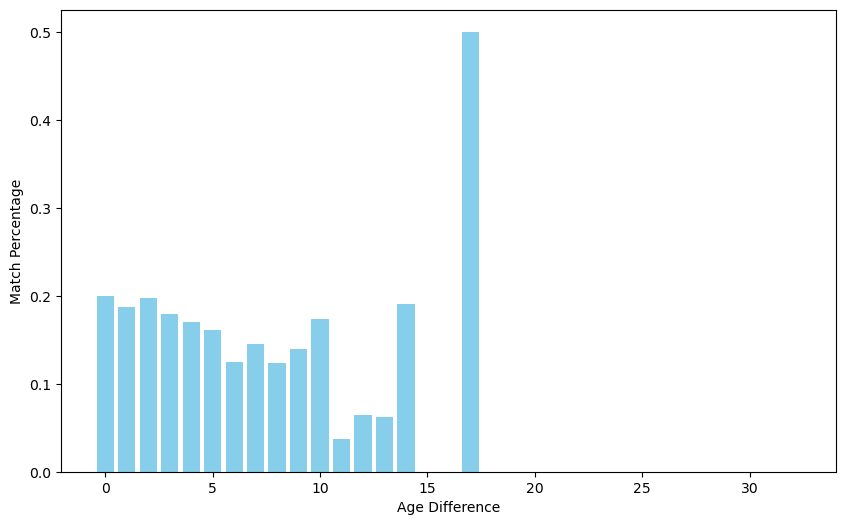

In [63]:
x = clean_df.groupby(['Age Difference']).agg(
    match_pec = ('IsMatch','mean')
).reset_index()

x


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x['Age Difference'], x['match_pec'], color='skyblue')
plt.xlabel('Age Difference')
plt.ylabel('Match Percentage')



#plt.xticks(rotation=45, ha='right')

# # Adding labels directly on the bars
# ax.bar_label(bars, fmt='%.2f')

plt.show()

In [79]:
clean_df[(clean_df['Age Difference'] == 17)]

,RowCount,Gender_P1,Age_P1,Age_P2,Age Difference,Race_P1,Race_P2,SameRaceFlag,ImportanceSameRace_P1,ImportanceSameReligion_P1,...,AmbitiousImportance_F_F,SharedInterestImportance_M_M,SharedInterestImportance_F_F,AttractiveImportanceDelta,SincereImportanceDelta,IntelligenceImportanceDelta,AmbitiousImportanceDelta,SharedInterestImportanceDelta,ValuesDelta,Similar_Values_Bucket
810,1,female,22,39,17,European/Caucasian-American,European/Caucasian-American,1,2,2,...,15.00,5.00,10.00,25.00,0.00,5.00,15.00,5.00,50.00,20% - 30%
955,1,female,22,39,17,European/Caucasian-American,European/Caucasian-American,1,1,1,...,5.00,5.00,20.00,25.00,0.00,5.00,5.00,15.00,50.00,20% - 30%
2179,1,female,25,42,17,European/Caucasian-American,European/Caucasian-American,1,8,8,...,17.31,2.38,15.38,8.43,6.50,6.50,14.93,13.00,49.36,30% - 40%
2305,1,female,25,42,17,Black/African American,European/Caucasian-American,0,2,1,...,19.23,2.38,17.31,12.27,10.35,4.58,16.85,14.93,58.98,20% - 30%
2370,1,female,25,42,17,Latino/Hispanic American,European/Caucasian-American,0,9,10,...,17.24,2.38,15.52,8.29,6.57,6.57,14.86,13.14,49.43,30% - 40%
2694,1,male,42,25,17,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,5,1,...,15.69,2.38,15.69,6.16,6.16,6.16,13.31,13.31,45.10,0% - 10%
2698,1,male,42,25,17,European/Caucasian-American,European/Caucasian-American,1,5,1,...,16.98,2.38,15.09,10.60,4.94,4.94,14.60,12.71,47.79,0% - 10%
2699,1,male,42,25,17,European/Caucasian-American,European/Caucasian-American,1,5,1,...,17.31,2.38,15.38,8.43,6.50,6.50,14.93,13.00,49.36,30% - 40%
2706,1,male,42,25,17,European/Caucasian-American,Black/African American,0,5,1,...,19.23,2.38,17.31,12.27,10.35,4.58,16.85,14.93,58.98,20% - 30%
2711,1,male,42,25,17,European/Caucasian-American,Latino/Hispanic American,0,5,1,...,17.24,2.38,15.52,8.29,6.57,6.57,14.86,13.14,49.43,30% - 40%
